In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("Customer.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2159,8007-YYPWD,Female,0,No,No,15,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.05,369.1,No
2285,4307-KTUMW,Male,0,Yes,No,53,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,93.90,5029.2,Yes
3077,7284-ZZLOH,Male,0,Yes,No,45,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Credit card (automatic),53.30,2296.25,No
4139,7278-CKDNC,Male,1,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45,No
2389,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No


In [9]:
data.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [10]:
data.drop('customerID', axis='columns', inplace=True)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [13]:
### handling missing values 

In [14]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [16]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#drop null values 
data = data.dropna(how="any", axis=0)

In [18]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
data.shape

(7032, 20)

In [20]:
tanure_churn_no = data[data.Churn=='No'].tenure
tanure_churn_yes = data[data.Churn=='Yes'].tenure

In [21]:
tanure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

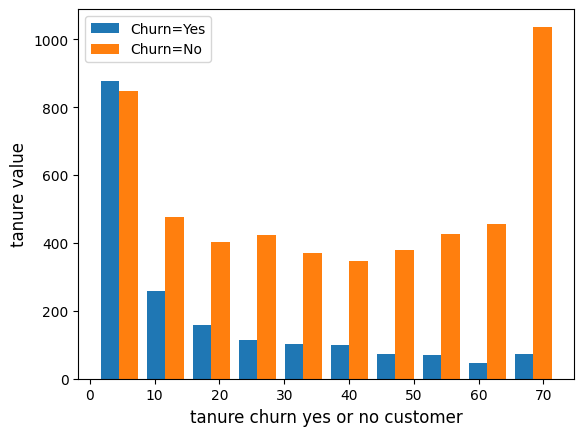

In [22]:
plt.hist([tanure_churn_yes, tanure_churn_no], label=['Churn=Yes', "Churn=No"])
plt.xlabel("tanure churn yes or no customer", fontsize=(12))
plt.ylabel("tanure value", fontsize=(12))
plt.legend()
plt.show()

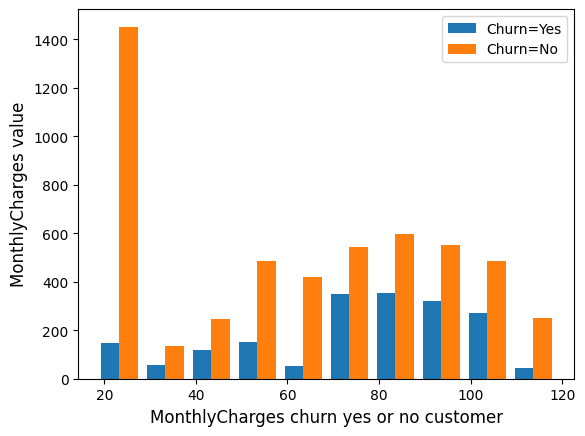

In [23]:
month_churn_no = data[data.Churn=='No'].MonthlyCharges
month_churn_yes = data[data.Churn=='Yes'].MonthlyCharges

plt.hist([month_churn_yes, month_churn_no], label=['Churn=Yes', "Churn=No"])
plt.xlabel("MonthlyCharges churn yes or no customer", fontsize=(12))
plt.ylabel("MonthlyCharges value", fontsize=(12))
plt.legend()
plt.show()

### One Hot Coding 

In [24]:
for columns in data:
    print(columns, ":- ", data[columns].unique(), "\n")

gender :-  ['Female' 'Male'] 

SeniorCitizen :-  [0 1] 

Partner :-  ['Yes' 'No'] 

Dependents :-  ['No' 'Yes'] 

tenure :-  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService :-  ['No' 'Yes'] 

MultipleLines :-  ['No phone service' 'No' 'Yes'] 

InternetService :-  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity :-  ['No' 'Yes' 'No internet service'] 

OnlineBackup :-  ['Yes' 'No' 'No internet service'] 

DeviceProtection :-  ['No' 'Yes' 'No internet service'] 

TechSupport :-  ['No' 'Yes' 'No internet service'] 

StreamingTV :-  ['No' 'Yes' 'No internet service'] 

StreamingMovies :-  ['No' 'Yes' 'No internet service'] 

Contract :-  ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling :-  ['Yes' 'No'] 

PaymentMethod :-  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [25]:
data.replace("No internet service", "No", inplace=True)
data.replace("No phone service", "No", inplace=True)

In [26]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [27]:
a = []
for columns in data:
    if data[columns].dtypes=="object":
        a.append(columns)
        print(columns, ":- ", data[columns].unique())

gender :-  ['Female' 'Male']
Partner :-  ['Yes' 'No']
Dependents :-  ['No' 'Yes']
PhoneService :-  ['No' 'Yes']
MultipleLines :-  ['No' 'Yes']
InternetService :-  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :-  ['No' 'Yes']
OnlineBackup :-  ['Yes' 'No']
DeviceProtection :-  ['No' 'Yes']
TechSupport :-  ['No' 'Yes']
StreamingTV :-  ['No' 'Yes']
StreamingMovies :-  ['No' 'Yes']
Contract :-  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :-  ['Yes' 'No']
PaymentMethod :-  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :-  ['No' 'Yes']


In [28]:
data.replace('No', 0, inplace=True)
data.replace('Yes', 1, inplace=True)

In [29]:
for columns in data:
    if data[columns].dtypes=="object":
        #a.append(columns)
        print(columns, ":- ", data[columns].unique())

gender :-  ['Female' 'Male']
InternetService :-  ['DSL' 'Fiber optic' 0]
Contract :-  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :-  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
data.replace("Female", 0, inplace=True)
data.replace("Male", 1, inplace=True)

In [31]:
for columns in data:
    if data[columns].dtypes=="object":
        #a.append(columns)
        print(columns, ":- ", data[columns].unique())

InternetService :-  ['DSL' 'Fiber optic' 0]
Contract :-  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :-  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [32]:
data.replace("DSL", 1, inplace=True)
data.replace("Fiber optic", 2, inplace=True)
data.replace("Month-to-month", 0, inplace=True)
data.replace("One year", 1, inplace=True)
data.replace("Two year", 2, inplace=True)
data.replace("Electronic check", 0, inplace=True)
data.replace("Mailed check", 1, inplace=True)
data.replace("Bank transfer (automatic)", 2, inplace=True)
data.replace("Credit card (automatic)", 3, inplace=True)

In [33]:
for columns in data:
    if data[columns].dtypes=="object":
        #a.append(columns)
        print(columns, ":- ", data[columns].unique())

In [34]:
# we can see here no one column has dtype object

In [35]:
for columns in data:
    #if data[columns].dtypes=="object":
        #a.append(columns)
        print(columns, ":- ", data[columns].unique())

gender :-  [0 1]
SeniorCitizen :-  [0 1]
Partner :-  [1 0]
Dependents :-  [0 1]
tenure :-  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :-  [0 1]
MultipleLines :-  [0 1]
InternetService :-  [1 2 0]
OnlineSecurity :-  [0 1]
OnlineBackup :-  [1 0]
DeviceProtection :-  [0 1]
TechSupport :-  [0 1]
StreamingTV :-  [0 1]
StreamingMovies :-  [0 1]
Contract :-  [0 1 2]
PaperlessBilling :-  [1 0]
PaymentMethod :-  [0 1 2 3]
MonthlyCharges :-  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :-  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :-  [0 1]


In [36]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### scalling 

In [37]:
col = ["MonthlyCharges", "TotalCharges", "tenure"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[col] = scaler.fit_transform(data[col])

In [38]:
for columns in data:
    print(columns, ":- ", data[columns].unique(), "\n")

gender :-  [0 1] 

SeniorCitizen :-  [0 1] 

Partner :-  [1 0] 

Dependents :-  [0 1] 

tenure :-  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] 

PhoneService :-  [0 1] 

MultipleLines :-  [0 1] 

InternetService :-  [1 2 0] 

OnlineSecurity 

In [39]:
x = data.drop("Churn", axis="columns")
y = data["Churn"]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [41]:
x_train.shape

(5625, 19)

In [42]:
y_train.shape

(5625,)

In [43]:
x_test.shape

(1407, 19)

In [44]:
import tensorflow as tf 
from tensorflow import keras 
model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer="adam",loss="binary_crossentropy" , metrics=["accuracy"])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 3ms/step - loss: 0.7711 - accuracy: 0.5127
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.7691
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7840
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.7886
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7932
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.7943
Epoch 7/50
176/176 [==============================] - 1s 3ms/step - loss: 0.5207 - accuracy: 0.7968
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7973
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.7991
Epoch 10/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7993

In [45]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8038


[0.414905309677124, 0.8038379549980164]

In [46]:
y_pred_train = model.predict(x_train)

176/176 [==============================] - 1s 2ms/step


In [47]:
a = []
for i in y_pred_train:
    if i>0.5:
        a.append(1)
    else:
        a.append(0)

In [48]:
a

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [49]:
y_train[:10]

4954    1
3918    1
5406    0
1637    0
5191    0
1761    0
1813    0
4686    0
6214    0
3551    1
Name: Churn, dtype: int64

In [50]:
###Classification report give overall performance 

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(a, y_train))

              precision    recall  f1-score   support

           0       0.93      0.85      0.88      4501
           1       0.54      0.73      0.62      1124

    accuracy                           0.82      5625
   macro avg       0.73      0.79      0.75      5625
weighted avg       0.85      0.82      0.83      5625



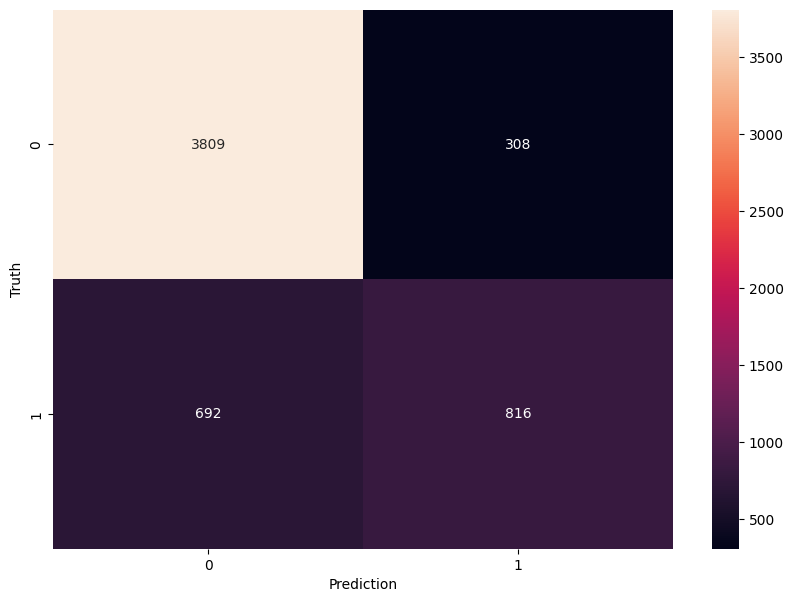

In [52]:
import seaborn as sns 
cm = tf.math.confusion_matrix(labels=y_train, predictions=a)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel('Truth')
plt.show()

#### Accurancy

In [53]:
accurancy = (3740+865)/(3740+865+377+643)

In [54]:
round(accurancy,2)

0.82

#### Precision

In [55]:
Precision_0 = (3740)/(3740+377)

In [56]:
round(Precision_0, 2)

0.91

In [57]:
Precision_1 = (865)/(865+643)

In [58]:
round(Precision_1, 2)

0.57

#### Recall

In [59]:
Recall_0 = (3740)/(3740+643)

In [60]:
round(Recall_0, 2)

0.85

In [61]:
Recall_1 = (865)/(865+377)

In [62]:
round(Recall_1, 2)

0.7